#                                 Project for neuro-fuzzy computing


##                         Konstantinos Konstntinidis 2546 Stavrinos Nikolaos 2631

Για τη παρουσίαση του project μας επιλέξαμε να τρέξουμε τον κώδικα τοπικά στο jupiter notebook σε environment του tensorflow για cpu έτσι ώστε να μπορέσουμε να περιγράψουμε κάθε κομμάτι του κώδικα ξεχωριστά.



## Επιλέγουμε να κάνουμε train το μοντέλο μας με χρηση της τιμής close από τη κατανομή

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

# Importing the training set
dataset_train = pd.read_excel('Stock_Price_Training_Data.xlsx')
training_set = dataset_train.iloc[:,4:5].values
print(training_set)

[[663.59]
 [666.45]
 [657.21]
 ...
 [785.05]
 [782.79]
 [771.82]]


## Χρησιμοποιυμε scaling των τιμων απο -1 εως 1 
καθως με μεγαλες τιμες το training γινεται ασταθες που σημαίνει ότι μπορεί να υποφέρει από κακή απόδοση κατά τη διάρκεια της μάθησης, με αποτέλεσμα υψηλότερο generalization error.

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
training_set_scaled = sc.fit_transform(training_set)

# Τα δεδομενα μας θα βασιζονται σε προβλεψη 60 timesteps και 1 output
 πρόκειται να προβλέψουμε την τιμή της μετοχής όταν ανοίγει με βάση τις τιμές μετοχών για τις τελευταίες 60 ημέρες και χρησιμοποιουμε όλες από τις 1258 τιμές που μας δίνονται.

In [3]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping
τα Frameworks όπως Keras / TensorFlow / PyTorch απαιτούν το σύνολο δεδομένων να γίνει reshaped σε άλλη διάσταση που την καθορίζει η δεύτερη του παράμετρος https://www.tensorflow.org/api_docs/python/tf/reshape

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the reccurent neural network for our prediction

## Initialising the RNN

Επιλεξαμε την LSTM καθως μπορει να απομνημονεύσει πληροφορίες για μεγάλα χρονικά διαστήματα, και ειναι χρησιμη για μεγαλα input 
files με training data,οπως στη δικια μας περιπτωση.

## Χρησιμοποιόυμε 4 layers της LSTM

In [5]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100,return_sequences = True,input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
#regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
#regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
#regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

In [6]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 282,101
Trainable params: 282,101
Non-trainable params: 0
_________________________________________________________________


## Setting the optimizer
## Χρησιμοποιούμε τον [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) με τις βασικές παραμέτρους του όπως χρησιμοποιόυνται και στο site του tensorflow
Ο Adam είναι ένας αλγόριθμος βελτιστοποίησης που μπορεί να χρησιμοποιηθεί αντί της διαδικασίας της κλασικής stochastic gradient descent για την ενημέρωση επαναληπτικών βαρών δικτύου με βάση τα δεδομένα εκπαίδευσης.

In [7]:
optimizer = optimizers.Adam(lr=0.001 , beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


## Loss function
Ορίζουμε ως loss function μας την [mean_squared_error](https://keras.io/api/losses/regression_losses/#mean_squared_error-function)


In [8]:
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=['accuracy'])


## Start the training

In [9]:
start=time.time()
# Fitting the RNN to the Training set
history=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
end=time.time()

Epoch 1/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0580 - accuracy: 8.3472e-04
Epoch 2/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0247 - accuracy: 8.3472e-04
Epoch 3/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0182 - accuracy: 8.3472e-04
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0154 - accuracy: 8.3472e-04
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0134 - accuracy: 8.3472e-04
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0124 - accuracy: 8.3472e-04
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0105 - accuracy: 8.3472e-04
Epoch 8/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0095 - accuracy: 8.3472e-04
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0091 - accuracy: 8.3472e-04
Epoch 10/100
38/38 [==============================] - 4

38/38 [==============================] - 4s 116ms/step - loss: 0.0031 - accuracy: 8.3472e-04
Epoch 79/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0029 - accuracy: 8.3472e-04
Epoch 80/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0032 - accuracy: 8.3472e-04
Epoch 81/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0033 - accuracy: 8.3472e-04
Epoch 82/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0033 - accuracy: 8.3472e-04
Epoch 83/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0029 - accuracy: 8.3472e-04
Epoch 84/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0029 - accuracy: 8.3472e-04
Epoch 85/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0030 - accuracy: 8.3472e-04
Epoch 86/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0031 - accuracy: 8.3472e-04
Epoch 87/100
38/38 [==============================] - 4s 10

In [10]:
print("It took '{}' seconds to to train the model".format(np.round(end-start,4)))

It took '430.0952' seconds to to train the model


## Εκτύπωση του loss του μοντελου μας

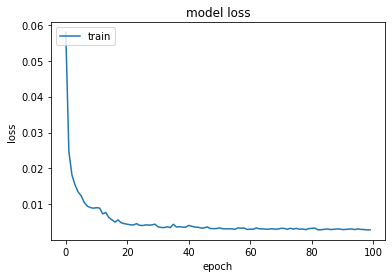

In [11]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Visual Comparison

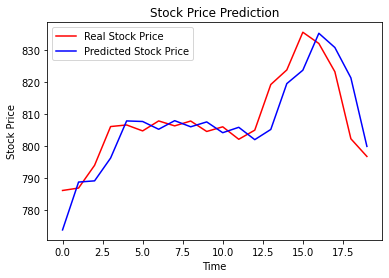

In [12]:
dataset_test = pd.read_excel('Google_Stock_Price_Test.xlsx')
real_stock_price = dataset_test['Close'].values


# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)




# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [13]:
total=0
for i in range(0, len(real_stock_price)):
    temp = real_stock_price[i]-predicted_stock_price[i]
    total += abs(temp)
    temp = 0

real_error = total/len(real_stock_price)
print(real_error)

[5.6987276]


In [14]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)))

7.529168076475977
